In [738]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"]=True
import statsmodels.api as sm
import numpy as np
data_4v = pd.read_excel("Datos_ionización_4V.xlsx")
conf1 = pd.DataFrame(data={"voltaje":data_4v["VOLTAJES (volts)"], "corriente":data_4v["CORRIENTE (conf1,mA)"]});
conf2 = pd.DataFrame(data={"voltaje":data_4v["VOLTAJES (volts)"], "corriente":data_4v["CORRIENTE (conf2, mA)"]})

# FILAMENTO 4V

# Filamento a 4 Volts

## Configuración 1

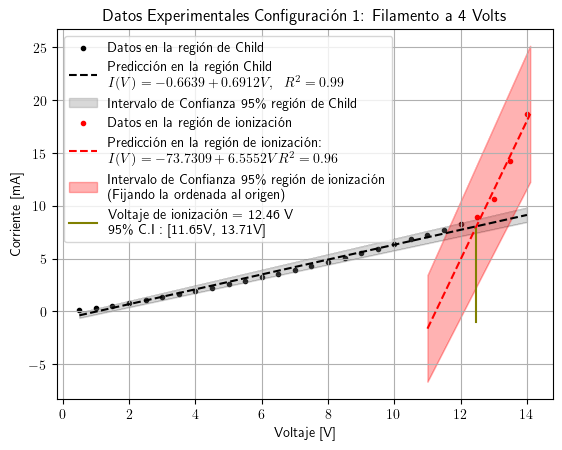

In [484]:

x1 = np.linspace(0.5,14,3); x2 = np.linspace(conf1.voltaje[21], 14.1,3)

linea_arriba = lambda dato, ci_sup_ordenada, ci_sup_pendiente : ci_sup_ordenada + ci_sup_pendiente*dato; y_1_95 = linea_arriba(x1, -0.945,0.672  )
linea_abajo = lambda dato, ci_inf_ordenada, ci_inf_pendiente : ci_inf_ordenada + ci_inf_pendiente*dato; y_1_05 = linea_abajo(x1,-0.486 ,  0.736 )


conf1 = pd.DataFrame(data={"voltaje":data_4v["VOLTAJES (volts)"], "corriente":data_4v["CORRIENTE (conf1,mA)"]})
plt.scatter(x=conf1.voltaje[0:24], y = conf1.corriente[0:24],c="black", marker=".", label="Datos en la región de Child")
plt.plot(x1,  -0.7157 +    0.7036*x1,  color = "black", label = "Predicción en  la  región Child\n $I(V) = -0.6639 +   0.6912V, ~~R^2 = 0.99$", linestyle = "--")
plt.plot(x1, y_1_95, color = "black", lw = 0.1, linestyle = "--")
plt.plot(x1, y_1_05, color = "black", lw = 0.1, linestyle = "--")
plt.fill_between(x1, y_1_95, y_1_05, where=(y_1_95 < y_1_05), color='grey', alpha=0.3, interpolate=True, label='Intervalo de Confianza 95\%\ región de Child')




linea_sup = lambda dato, ordenada, std_ordenada, pendiente, std_pendiente: (ordenada + std_ordenada) + (pendiente+std_pendiente)*dato
linea_inf = lambda dato, ordenada, std_ordenada, pendiente, std_pendiente: (ordenada - std_ordenada) + (pendiente-std_pendiente)*dato

y_1_05_ion = linea_sup(x2, -73.7309 ,    0  , 6.5552  ,    0.914/2  )
y_1_95_ion = linea_inf(x2, -73.7309 ,   0  , 6.5552    ,  0.914/2 )

plt.scatter(x=conf1.voltaje[24:], y = conf1.corriente[24:],c="red", marker=".", label="Datos en la región de ionización")
plt.plot(x2, -73.7309  + 6.5552 *x2,color = "red", label = "Predicción en la región de ionización:\n $I(V) = -73.7309  + 6.5552V  R^2 = 0.96$", linestyle = "--")
plt.plot(x2, y_1_95_ion, color = "red", lw = 0.1, linestyle = "--")
plt.plot(x2, y_1_05_ion, color = "red", lw = 0.1, linestyle = "--")
plt.fill_between(x2, y_1_95_ion, y_1_05_ion, where=(y_1_95_ion < y_1_05_ion), color='red', alpha=0.3, interpolate=True, label='Intervalo de Confianza 95\%\  región de ionización\n (Fijando la ordenada al origen)')


# Graficar
plt.plot([12.46, 12.46], [-1, 7.8], '-',color="olive", label = "Voltaje de ionización = 12.46 V\n 95\% C.I : [11.65V, 13.71V]")
plt.grid(); plt.title(" Datos Experimentales Configuración 1: Filamento  a 4 Volts"); plt.legend(); plt.xlabel("Voltaje [V]"); plt.ylabel("Corriente [mA]");

In [466]:
X = sm.add_constant(conf1.voltaje[0:24])
Y = conf1.corriente[0:24]
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              corriente   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     2069.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           2.95e-23
Time:                        18:54:31   Log-Likelihood:               -0.88931
No. Observations:                  24   AIC:                             5.779
Df Residuals:                      22   BIC:                             8.135
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7157      0.111     -6.476      0.0

In [469]:
Xion = sm.add_constant(conf1.voltaje[24:])
Yion = conf1.corriente[24:]
modelion = sm.OLS(Yion,Xion).fit()
print(modelion.summary())

                            OLS Regression Results                            
Dep. Variable:              corriente   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     51.46
Date:                Mon, 11 Dec 2023   Prob (F-statistic):             0.0189
Time:                        18:54:47   Log-Likelihood:                -4.3752
No. Observations:                   4   AIC:                             12.75
Df Residuals:                       2   BIC:                             11.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -73.7309     12.119     -6.084      0.0

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [382]:
intervalo_confianza_80 = model.conf_int(alpha=0.80)  # alpha=1-0.80 para 80% de confianza

print(intervalo_confianza_80)

                0         1
const   -4.035248 -3.920153
voltaje  0.991264  1.000630


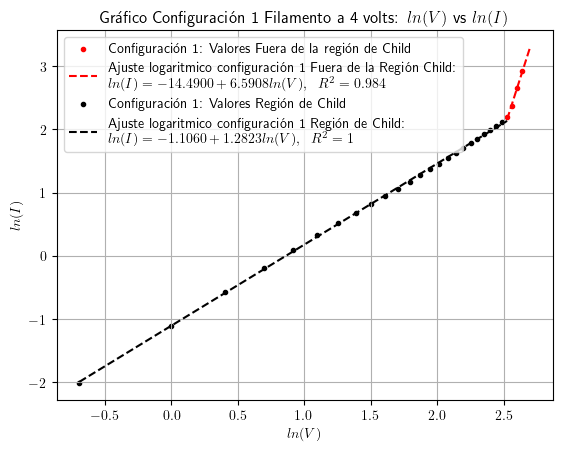

In [245]:
log_conf1 = pd.DataFrame(data={"voltaje":data_4v["VOLTAJES (volts)"].apply(lambda x: np.log(x)), "corriente":data_4v["CORRIENTE (conf1,mA)"].apply(lambda x: np.log(x))})
log_conf2 = pd.DataFrame(data={"voltaje":data_4v["VOLTAJES (volts)"].apply(lambda x: np.log(x)), "corriente":data_4v["CORRIENTE (conf1,mA)"].apply( lambda x: np.log(x))})

x = np.linspace(log_conf1.voltaje[0],log_conf1.voltaje[24],10)
x2 = np.linspace(log_conf1.voltaje[24],2.7,10)
plt.scatter(log_conf1.voltaje[24:28], log_conf1.corriente[24:28], c = "red", marker=".", label = "Configuración 1: Valores Fuera de la región de Child")
plt.plot(x2, -14.4900 +   6.5908*x2, color = "red", label = "Ajuste logaritmico configuración 1 Fuera de la Región Child:\n $ln(I) = -14.4900 + 6.5908ln(V),~~R^2=0.984$", linestyle = "--")
plt.scatter(log_conf1.voltaje[0:24], log_conf1.corriente[0:24], c = "black", marker=".", label = "Configuración 1: Valores Región de Child")
plt.plot(x, -1.1060 +1.2823 *x , color = "black", label = "Ajuste logaritmico configuración 1 Región de Child:\n $ln(I) = -1.1060 +1.2823ln(V),~~R^2=1 $", linestyle = "--")

plt.grid(); plt.title("Gráfico Configuración 1 Filamento a 4 volts: $ln(V)$ vs $ln(I)$"); plt.xlabel("$ln(V)$"); plt.ylabel("$ln(I)$");plt.legend();

In [199]:
X =  sm.add_constant(log_conf1["voltaje"][0:24])
Y =  log_conf1["corriente"][0:24]
modelo = sm.OLS(Y,X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              corriente   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.060e+04
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           2.91e-41
Time:                        14:16:27   Log-Likelihood:                 64.824
No. Observations:                  24   AIC:                            -125.6
Df Residuals:                      22   BIC:                            -123.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1060      0.008   -145.400      0.0

In [201]:
X =  sm.add_constant(log_conf1["voltaje"][24:28])
Y =  log_conf1["corriente"][24:28]
modelo = sm.OLS(Y,X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              corriente   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     125.1
Date:                Mon, 11 Dec 2023   Prob (F-statistic):            0.00790
Time:                        14:17:03   Log-Likelihood:                 7.7114
No. Observations:                   4   AIC:                            -11.42
Df Residuals:                       2   BIC:                            -12.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.4900      1.522     -9.519      0.0

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### Región  conf1:

***Región de Child:***

const         -0.4464     
voltaje        0.6319   


***Región fuera:***

const        -18.8079     
voltaje        2.3700   

## Configuración 2

In [232]:
conf2 = pd.DataFrame(data={"voltaje":data_4v["VOLTAJES (volts)"], "corriente":data_4v["CORRIENTE (conf2, mA)"]})


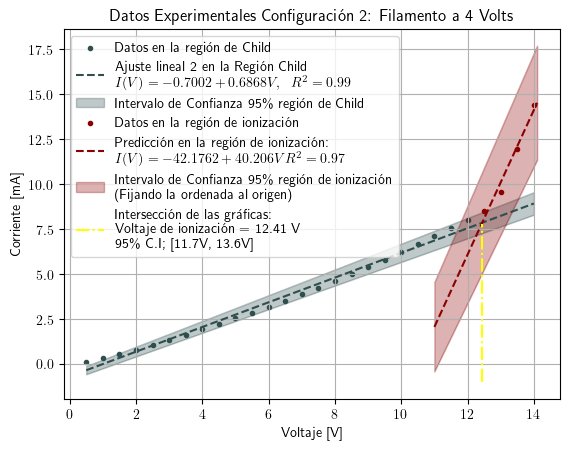

In [499]:
x1 = np.linspace(0.5,14,3); 

linea_arriba = lambda dato, ci_sup_ordenada, ci_sup_pendiente : ci_sup_ordenada + ci_sup_pendiente*dato; y_1_95 = linea_arriba(x1, -0.911,0.657  )
linea_abajo = lambda dato, ci_inf_ordenada, ci_inf_pendiente : ci_inf_ordenada + ci_inf_pendiente*dato; y_1_05 = linea_abajo(x1,-0.489 ,  0.716 )
plt.scatter(x=conf2.voltaje[0:24], y = conf2.corriente[0:24],c="darkslategrey", marker=".", label="Datos en la región de Child")
plt.plot(x1, -0.7002 +    0.6868*x1,  color = "darkslategrey", label = "Ajuste lineal 2 en  la  Región Child\n $I(V) = -0.7002 +   0.6868V, ~~R^2 = 0.99$", linestyle = "--")
plt.plot(x1, y_1_95, color = "darkslategrey", lw = 0.1, linestyle = "--")
plt.plot(x1, y_1_05, color = "darkslategrey", lw = 0.1, linestyle = "--")
plt.fill_between(x1, y_1_95, y_1_05, where=(y_1_95 < y_1_05), color='darkslategrey', alpha=0.3, interpolate=True, label='Intervalo de Confianza 95\%\ región de Child')






linea_sup = lambda dato, ordenada, std_ordenada, pendiente, std_pendiente: (ordenada + std_ordenada) + (pendiente+std_pendiente)*dato
linea_inf = lambda dato, ordenada, std_ordenada, pendiente, std_pendiente: (ordenada - std_ordenada) + (pendiente-std_pendiente)*dato

y_1_05_ion = linea_sup(x2, -42.1762 ,    0  , 4.0206  ,    0.450/2  )
y_1_95_ion = linea_inf(x2, -42.1762 ,   0  , 4.0206    ,  0.450/2  )

plt.scatter(x=conf2.voltaje[24:], y = conf2.corriente[24:],c="darkred", marker=".", label="Datos en la región de ionización")
plt.plot(x2, -42.1762  + 4.0206 *x2,color = "darkred", label = "Predicción en la región de ionización:\n $I(V) = -42.1762  + 40.206V  R^2 = 0.97$", linestyle = "--")
plt.plot(x2, y_1_95_ion, color = "darkred", lw = 0.1, linestyle = "--")
plt.plot(x2, y_1_05_ion, color = "darkred", lw = 0.1, linestyle = "--")
plt.fill_between(x2, y_1_95_ion, y_1_05_ion, where=(y_1_95_ion < y_1_05_ion), color='darkred', alpha=0.3, interpolate=True, label='Intervalo de Confianza 95\%\  región de ionización\n (Fijando la ordenada al origen)')






# Graficar
plt.plot([12.44, 12.44], [-1, 7.8], '-.',color="yellow", label = "Intersección de las gráficas: \n Voltaje de ionización = 12.41 V\n 95\%\ C.I; [11.7V, 13.6V]")
plt.grid(); plt.title("Datos Experimentales Configuración 2: Filamento  a 4 Volts"); plt.legend(); plt.xlabel("Voltaje [V]"); plt.ylabel("Corriente [mA]");







In [234]:
X = sm.add_constant(conf2.voltaje[0:24]); Y = conf2.corriente[0:24]
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              corriente   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     2328.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           8.18e-24
Time:                        14:57:13   Log-Likelihood:                 1.1061
No. Observations:                  24   AIC:                             1.788
Df Residuals:                      22   BIC:                             4.144
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7002      0.102     -6.886      0.0

In [237]:
X = sm.add_constant(conf2.voltaje[24:28]); Y = conf2.corriente[24:28]
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              corriente   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     79.80
Date:                Mon, 11 Dec 2023   Prob (F-statistic):             0.0123
Time:                        14:59:23   Log-Likelihood:                -1.5425
No. Observations:                   4   AIC:                             7.085
Df Residuals:                       2   BIC:                             5.857
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.1762      5.969     -7.066      0.0

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


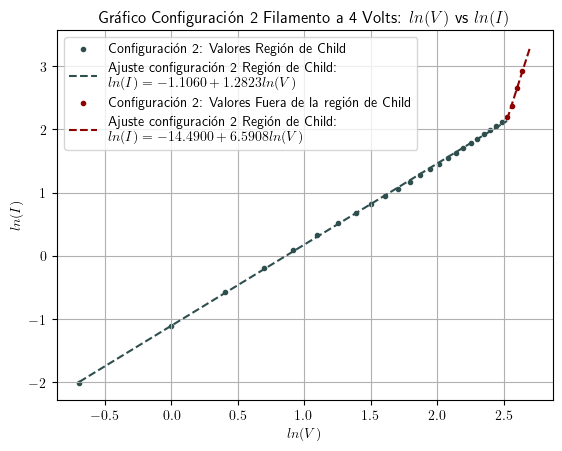

In [264]:

x = np.linspace(log_conf1.voltaje[0],log_conf1.voltaje[24],10)
plt.scatter(log_conf2.voltaje[0:24], log_conf2.corriente[0:24], c = "darkslategrey", marker=".", label = "Configuración 2: Valores Región de Child")
plt.plot(x, -1.1060  + 1.2823 *x , color = "darkslategrey", label = "Ajuste configuración 2 Región de Child:\n $ln(I) =-1.1060 + 1.2823 ln(V) $", linestyle = "--")

x2 = np.linspace(log_conf1.voltaje[24],2.7,10)
plt.scatter(log_conf2.voltaje[24:28], log_conf2.corriente[24:28], c = "darkred", marker=".", label = "Configuración 2: Valores Fuera de la región de Child")
plt.plot(x2, -14.4900   +  6.5908*x2 , color = "darkred", label = "Ajuste configuración 2 Región de Child:\n $ln(I) =-14.4900  +  6.5908   ln(V) $", linestyle = "--")

plt.grid(); plt.title("Gráfico Configuración 2 Filamento a 4 Volts: $ln(V)$ vs $ln(I)$"); plt.xlabel("$ln(V)$"); plt.ylabel("$ln(I)$");plt.legend();

In [250]:
X =  sm.add_constant(log_conf2["voltaje"][0:24])
Y =  log_conf2["corriente"][0:24]
modelo = sm.OLS(Y,X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              corriente   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.060e+04
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           2.91e-41
Time:                        15:07:52   Log-Likelihood:                 64.824
No. Observations:                  24   AIC:                            -125.6
Df Residuals:                      22   BIC:                            -123.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1060      0.008   -145.400      0.0

In [253]:
X =  sm.add_constant(log_conf2["voltaje"][24:28])
Y =  log_conf2["corriente"][24:28]
modelo = sm.OLS(Y,X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              corriente   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     125.1
Date:                Mon, 11 Dec 2023   Prob (F-statistic):            0.00790
Time:                        15:10:43   Log-Likelihood:                 7.7114
No. Observations:                   4   AIC:                            -11.42
Df Residuals:                       2   BIC:                            -12.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.4900      1.522     -9.519      0.0

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [302]:
child = pd.DataFrame(data=conf1[0:24])
child.columns = ["Voltaje [V]", "Corriente [mA]"]

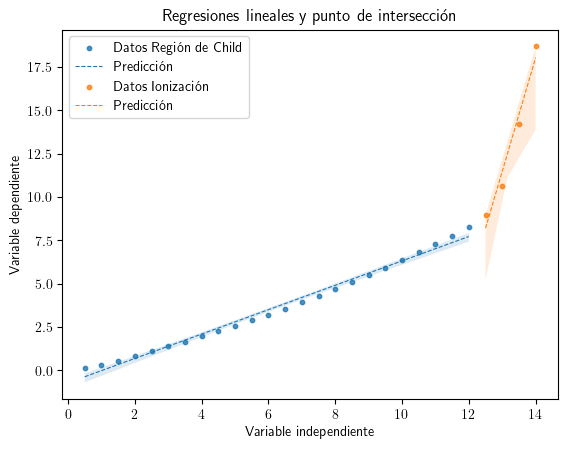

In [306]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

child = pd.DataFrame(data=conf1[0:24])
no_child = pd.DataFrame(data=conf1[24:28])

child.columns = ["Voltaje [V]", "Corriente [mA]"]
no_child.columns = ["Voltaje [V]", "Corriente [mA]"]

# Ajustar las líneas de regresión con regplot
sns.regplot(x='Voltaje [V]', y='Corriente [mA]', data=child, scatter_kws={'s': 10}, label='Datos Región de Child',line_kws={'label': 'Predicción', 'linestyle': '--', 'linewidth': 0.8})
sns.regplot(x='Voltaje [V]', y='Corriente [mA]', data=no_child, scatter_kws={'s': 10}, label='Datos Ionización',line_kws={'label': 'Predicción', 'linestyle': '--', 'linewidth': 0.8})



plt.xlabel('Variable independiente')
plt.ylabel('Variable dependiente')
plt.title('Regresiones lineales y punto de intersección')
plt.legend()
plt.show()




## Distinguiendo Regiones

In [108]:
conf1_child = conf1[0:18]; conf1_no_child = conf1[18:]
X1_child = sm.add_constant(conf1_child.voltaje); Y1_child = conf1_child.corriente
modelo = sm.OLS(Y1_child, X1_child).fit()
print(modelo.summary())

X1_child = sm.add_constant(conf1_no_child.voltaje); Y1_child = conf1_no_child.corriente
modelo = sm.OLS(Y1_child, X1_child).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              corriente   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2531.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           4.77e-19
Time:                        01:09:07   Log-Likelihood:                 11.139
No. Observations:                  18   AIC:                            -18.28
Df Residuals:                      16   BIC:                            -16.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4464      0.068     -6.567      0.0

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


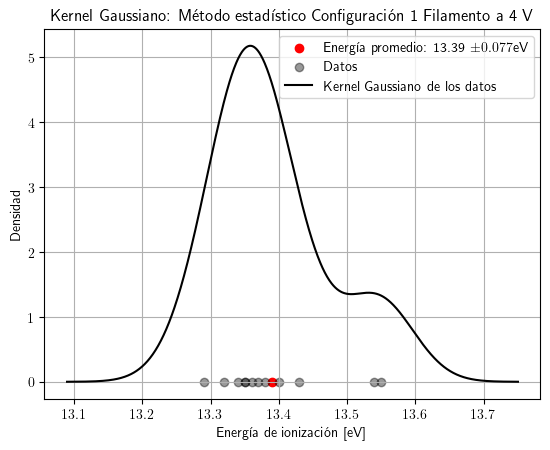

In [555]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

s =  np.array([13.29,13.38,13.40,13.43,13.35,13.34,13.54,13.36,13.55,13.35,13.37,13.32])
array_de_ceros = np.zeros(12)
import numpy as np

kde = gaussian_kde(s, bw_method='silverman')

x_vals = np.linspace(min(s) - 0.2, max(s) + 0.2, 1000)

# Evaluar la función de densidad de kernel en el rango de valores
kde_vals = kde.evaluate(x_vals)

# Graficar el resultado
plt.scatter(x = s.mean(), y=0, marker = "o", c = "red", label = "Energía promedio: 13.39 $\pm 0.077$eV")
plt.scatter(x=s, y=array_de_ceros, marker="o", c="black", label = "Datos",alpha=0.4)
plt.grid();
plt.plot(x_vals, kde_vals, 'black', label='Kernel Gaussiano de los datos')
plt.title('Kernel Gaussiano: Método estadístico Configuración 1 Filamento a 4 V')
plt.xlabel('Energía de ionización [eV]')
plt.ylabel('Densidad')
plt.legend()
plt.show()

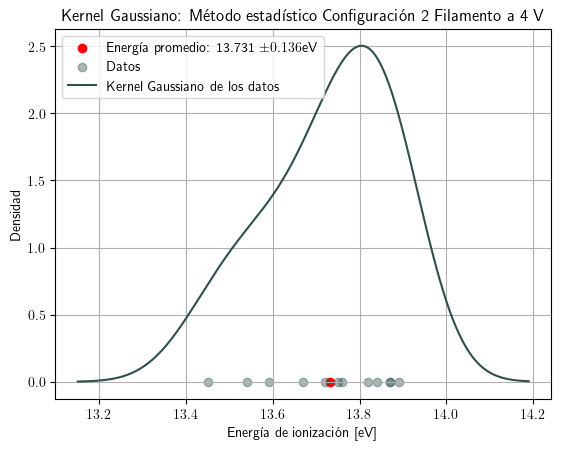

In [565]:
s2 =  np.array([13.84,13.87,13.54,13.45,13.59,13.87,13.76,13.82,13.89,13.72,13.67,13.75])
array_de_ceros = np.zeros(12)
import numpy as np

kde = gaussian_kde(s, bw_method='silverman')

x_vals = np.linspace(min(s2) - 0.3, max(s2) + 0.3, 1000)

# Evaluar la función de densidad de kernel en el rango de valores
kde_vals = kde.evaluate(x_vals)

# Graficar el resultado
plt.scatter(x = s2.mean(), y=0, marker = "o", c = "red", label = "Energía promedio: 13.731 $\pm 0.136$eV")
plt.scatter(x=s2, y=array_de_ceros, marker="o", c="darkslategrey", label = "Datos",alpha=0.4)
plt.grid();
plt.plot(x_vals, kde_vals, 'darkslategrey', label='Kernel Gaussiano de los datos')
plt.title('Kernel Gaussiano: Método estadístico Configuración 2 Filamento a 4 V')
plt.xlabel('Energía de ionización [eV]')
plt.ylabel('Densidad')
plt.legend()
plt.show()

In [561]:
s2.mean()
s2 =  np.array([13.84,13.87,13.54,13.45,13.59,13.87,13.76,13.82,13.89,13.72,13.67,13.75])
array_de_ceros = np.zeros(12)
import numpy as np

kde = gaussian_kde(s, bw_method='silverman')

x_vals = np.linspace(min(s2) - 0.3, max(s2) + 0.3, 1000)

# Evaluar la función de densidad de kernel en el rango de valores
kde_vals = kde.evaluate(x_vals)

# Graficar el resultado
plt.scatter(x = s2.mean(), y=0, marker = "o", c = "red", label = "Energía promedio: 13.731 $\pm 0.136$eV")
plt.scatter(x=s2, y=array_de_ceros, marker="o", c="darkslategrey", label = "Datos",alpha=0.4)
plt.grid();
plt.plot(x_vals, kde_vals, 'darkslategrey', label='Kernel Gaussiano de los datos')
plt.title('Kernel Gaussiano: Método estadístico Configuración 2 Filamento a 4 V')
plt.xlabel('Energía de ionización [eV]')
plt.ylabel('Densidad')
plt.legend()
plt.show()

13.730833333333335

### Región de Child conf2:

***Región de Child:***

const         -0.4464     
voltaje        0.6319     


***Región fuera***
const        -11.3108     
voltaje        1.6709 

In [115]:
conf2_child = conf2[0:18]; conf2_no_child = conf2[18:]
X2_child = sm.add_constant(conf2_child.voltaje); Y2_child = conf2_child.corriente
modelo = sm.OLS(Y2_child, X2_child).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              corriente   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2652.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           3.29e-19
Time:                        01:10:09   Log-Likelihood:                 11.881
No. Observations:                  18   AIC:                            -19.76
Df Residuals:                      16   BIC:                            -17.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4529      0.065     -6.944      0.0

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [117]:
conf2_child = conf2[0:18]; conf2_no_child = conf2[18:]
X2_child = sm.add_constant(conf2_no_child.voltaje); Y2_child = conf2_no_child.corriente
modelo = sm.OLS(Y2_child, X2_child).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              corriente   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     61.96
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.65e-06
Time:                        01:14:37   Log-Likelihood:                -23.069
No. Observations:                  16   AIC:                             50.14
Df Residuals:                      14   BIC:                             51.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.3108      2.584     -4.378      0.0

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# FILAMENTO A 6V

In [702]:
data_6v = pd.read_excel("Datos_ionización_6v.xlsx")
conf1_6V = pd.DataFrame(data={"voltaje":data_6v["VOLTAJES (volts)"], "corriente":data_6v["CORRIENTE (conf1,mA)"]})
conf2_6V = pd.DataFrame(data={"voltaje":data_6v["VOLTAJES (volts)"], "corriente":data_6v["CORRIENTE (conf2, mA)"]})

log_conf1_6 = pd.DataFrame(data={"voltaje":data_6v["VOLTAJES (volts)"].apply(lambda x: np.log(x)), "corriente":data_6v["CORRIENTE (conf1,mA)"].apply(lambda x: np.log(x))})
log_conf2_6 = pd.DataFrame(data={"voltaje":data_6v["VOLTAJES (volts)"].apply(lambda x: np.log(x)), "corriente":data_6v["CORRIENTE (conf2, mA)"].apply( lambda x: np.log(x))})


## Kernels

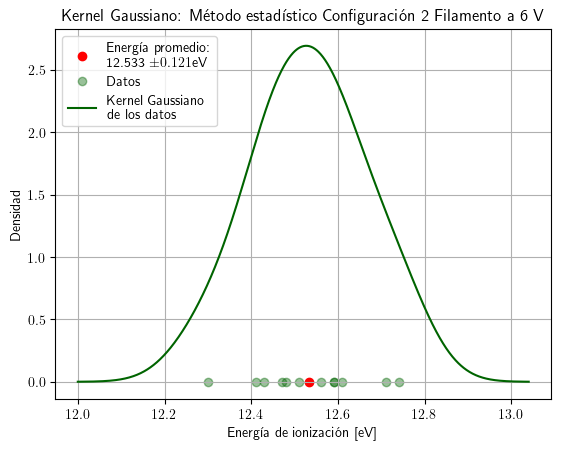

In [586]:
l1 = np.array([12.47,12.41,12.59,12.48,12.51,12.43,12.71,12.56,12.30,12.61,12.59,12.74])
array_de_ceros = np.zeros(12)

kde = gaussian_kde(l1, bw_method='silverman')

x_vals = np.linspace(min(l1) - 0.3, max(l1) + 0.3, 1000)

# Evaluar la función de densidad de kernel en el rango de valores
kde_vals = kde.evaluate(x_vals)

# Graficar el resultado
plt.scatter(x = l1.mean(), y=0, marker = "o", c = "red", label = "Energía promedio: \n12.533 $\pm 0.121$eV")
plt.scatter(x=l1, y=array_de_ceros, marker="o", c="darkgreen", label = "Datos",alpha=0.4)
plt.grid()
plt.plot(x_vals, kde_vals, 'darkgreen', label='Kernel Gaussiano \n de los datos')
plt.legend()
plt.title('Kernel Gaussiano: Método estadístico Configuración 2 Filamento a 6 V')
plt.xlabel('Energía de ionización [eV]')
plt.ylabel('Densidad')
plt.legend(loc='upper left')

plt.show()

In [587]:
l2.mean(), l2.std()

(11.966666666666669, 0.1929306150465036)

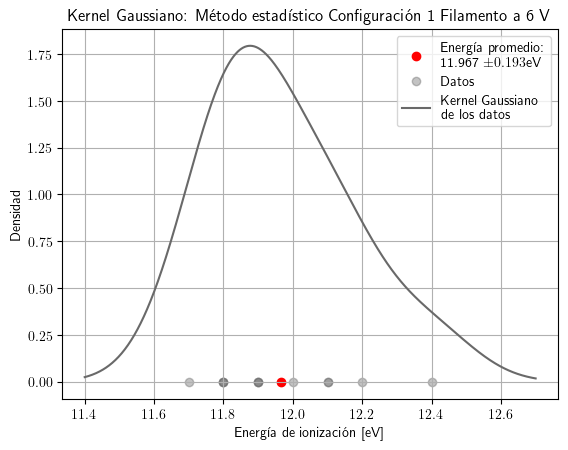

In [589]:
l2 = np.array( [11.8,12.2,11.9,12.1,11.9,11.8,11.9,11.7,11.8,12.4,12.1,12])
array_de_ceros = np.zeros(12)

kde = gaussian_kde(l2, bw_method='silverman')

x_vals = np.linspace(min(l2) - 0.3, max(l2) + 0.3, 1000)

# Evaluar la función de densidad de kernel en el rango de valores
kde_vals = kde.evaluate(x_vals)

# Graficar el resultado
plt.scatter(x = l2.mean(), y=0, marker = "o", c = "red", label = "Energía promedio:\n 11.967 $\pm 0.193$eV")
plt.scatter(x=l2, y=array_de_ceros, marker="o", c="dimgrey", label = "Datos",alpha=0.4)
plt.grid()
plt.plot(x_vals, kde_vals, 'dimgrey', label='Kernel Gaussiano\n de los datos')
plt.legend()
plt.title('Kernel Gaussiano: Método estadístico Configuración 1 Filamento a 6 V')
plt.xlabel('Energía de ionización [eV]')
plt.ylabel('Densidad')
plt.legend(loc='upper right')

## Configuración 1

In [690]:
X1 = sm.add_constant(conf1_6V.voltaje[0:21]); Y1 = conf1_6V.corriente[0:21]
model1 = sm.OLS(Y1,X1).fit()
X2 = sm.add_constant(conf1_6V.voltaje[21:28]); Y2 = conf1_6V.corriente[21:28]
model2= sm.OLS(Y2,X2).fit()

X1_ln= sm.add_constant(log_conf1_6.voltaje[0:21]); Y1_ln = log_conf1_6.corriente[0:21]
ln_model1 = sm.OLS(Y1_ln,X1_ln).fit()
X2_ln = sm.add_constant(log_conf1_6.voltaje[21:28]); Y2_ln = log_conf1_6.corriente[21:28]
ln_model2= sm.OLS(Y2_ln,X2_ln).fit()

In [636]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              corriente   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1274.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           1.38e-19
Time:                        01:34:17   Log-Likelihood:                -3.9666
No. Observations:                  22   AIC:                             11.93
Df Residuals:                      20   BIC:                             14.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4717      0.134     -3.516      0.0

In [661]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              corriente   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     118.0
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           0.000408
Time:                        01:55:57   Log-Likelihood:                -7.3095
No. Observations:                   6   AIC:                             18.62
Df Residuals:                       4   BIC:                             18.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -51.3949      6.122     -8.395      0.0

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


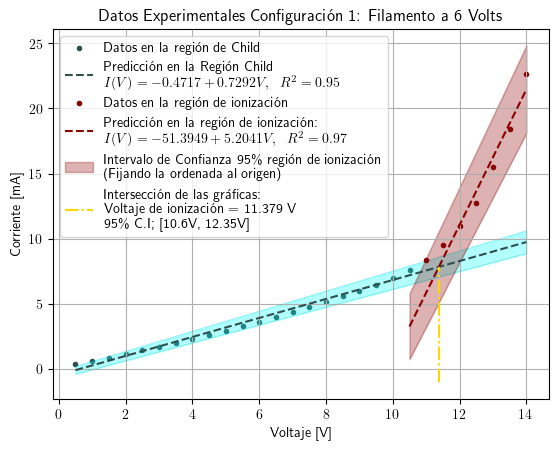

In [688]:
x1 = np.linspace(0.5,14,4)
x2 = np.linspace(10.5,14,4)

linea_arriba = lambda dato, ci_sup_ordenada, ci_sup_pendiente : ci_sup_ordenada + ci_sup_pendiente*dato; y_1_95 = linea_arriba(x1,-0.192 ,0.772  )
linea_abajo = lambda dato, ci_inf_ordenada, ci_inf_pendiente : ci_inf_ordenada + ci_inf_pendiente*dato; y_1_05 = linea_abajo(x1, -0.751 ,0.687 )
plt.scatter(x=conf1_6V.voltaje[0:21], y = conf1_6V.corriente[0:21],c="darkslategrey", marker=".", label="Datos en la región de Child")
plt.plot(x1, -0.4717  +    0.7292 *x1,  color = "darkslategrey", label = "Predicción en  la  Región Child\n $I(V) = -0.4717   +   0.7292 V, ~~R^2 = 0.95$", linestyle = "--")
plt.plot(x1, y_1_95, color = "darkslategrey", lw = 0.1, linestyle = "--")
plt.plot(x1, y_1_05, color = "darkslategrey", lw = 0.1, linestyle = "--")
plt.fill_between(x1, y_1_95, y_1_05, where=(y_1_95 > y_1_05),color='cyan',alpha=0.3)


plt.scatter(x=conf1_6V.voltaje[21:], y = conf1_6V.corriente[21:],c="darkred", marker=".", label="Datos en la región de ionización")

linea_sup = lambda dato, ordenada, std_ordenada, pendiente, std_pendiente: (ordenada + std_ordenada) + (pendiente+std_pendiente)*dato
linea_inf = lambda dato, ordenada, std_ordenada, pendiente, std_pendiente: (ordenada - std_ordenada) + (pendiente-std_pendiente)*dato

y_1_05_ion = linea_sup(x2, -51.3949 ,    0  , 5.2041  ,    0.479/2  )
y_1_95_ion = linea_inf(x2, -51.3949 ,   0  , 5.2041    ,  0.479/2  )

plt.plot(x2, -51.3949  + 5.2041 *x2,color = "darkred", label = "Predicción en la región de ionización:\n $I(V) = -51.3949  + 5.2041V ,~~ R^2 = 0.97$", linestyle = "--")
plt.plot(x2, y_1_95_ion, color = "darkred", lw = 0.1, linestyle = "--")
plt.plot(x2, y_1_05_ion, color = "darkred", lw = 0.1, linestyle = "--")
plt.fill_between(x2, y_1_95_ion, y_1_05_ion, where=(y_1_95_ion < y_1_05_ion), color='darkred', alpha=0.3, interpolate=True, label='Intervalo de Confianza 95\%\  región de ionización\n (Fijando la ordenada al origen)')

# Graficar
plt.plot([11.379, 11.379], [-1, 7.8], '-.',color="gold", label = "Intersección de las gráficas: \n Voltaje de ionización = 11.379 V\n 95\%\ C.I; [10.6V, 12.35V]")
plt.grid(); plt.title("Datos Experimentales Configuración 1: Filamento  a 6 Volts"); plt.legend(); plt.xlabel("Voltaje [V]"); plt.ylabel("Corriente [mA]");



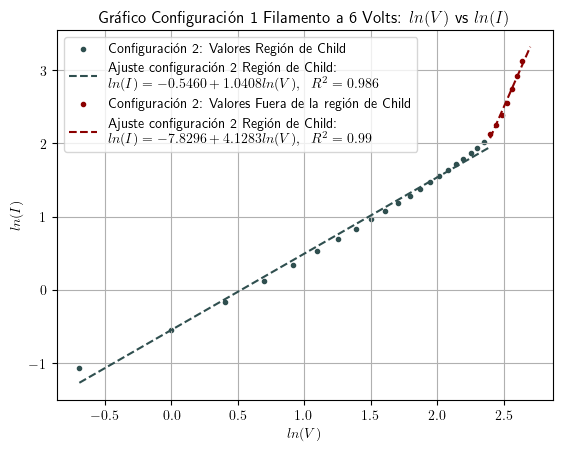

In [699]:
x = np.linspace(log_conf1_6.voltaje[0],log_conf1_6.voltaje[21],10)
plt.scatter(log_conf1_6.voltaje[0:21], log_conf1_6.corriente[0:21], c = "darkslategrey", marker=".", label = "Configuración 2: Valores Región de Child")
plt.plot(x, -0.5460   + 1.0408 *x , color = "darkslategrey", label = "Ajuste configuración 2 Región de Child:\n $ln(I) =-0.5460   + 1.0408  ln(V) ,~~R^2=0.986 $", linestyle = "--")

x2 = np.linspace(log_conf1_6.voltaje[21],2.7,10)
plt.scatter(log_conf1_6.voltaje[21:28], log_conf1_6.corriente[21:28], c = "darkred", marker=".", label = "Configuración 2: Valores Fuera de la región de Child")
plt.plot(x2, -7.8296   +  4.1283 *x2 , color = "darkred", label = "Ajuste configuración 2 Región de Child:\n $ln(I) =-7.8296   +  4.1283   ln(V),~~R^2 = 0.99 $", linestyle = "--")

plt.grid(); plt.title("Gráfico Configuración 1 Filamento a 6 Volts: $ln(V)$ vs $ln(I)$"); plt.xlabel("$ln(V)$"); plt.ylabel("$ln(I)$");plt.legend();

## Configuración 2

In [718]:
X1 = sm.add_constant(conf2_6V.voltaje[0:21]); Y1 = conf2_6V.corriente[0:21]
model1 = sm.OLS(Y1,X1).fit()
X2_ = sm.add_constant(conf2_6V.voltaje[21:28]); Y2_ = conf2_6V.corriente[21:28]
model2= sm.OLS(Y2_,X2_).fit()

X1_ln= sm.add_constant(log_conf2_6.voltaje[0:21]); Y1_ln = log_conf2_6.corriente[0:21]
ln_model1 = sm.OLS(Y1_ln,X1_ln).fit()
X2_ln = sm.add_constant(log_conf2_6.voltaje[21:28]); Y2_ln = log_conf2_6.corriente[21:28]
ln_model2= sm.OLS(Y2_ln,X2_ln).fit()

In [705]:
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:              corriente   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     101.2
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           0.000166
Time:                        02:52:44   Log-Likelihood:                -9.1471
No. Observations:                   7   AIC:                             22.29
Df Residuals:                       5   BIC:                             22.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.4713      5.013     -7.475      0.0

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


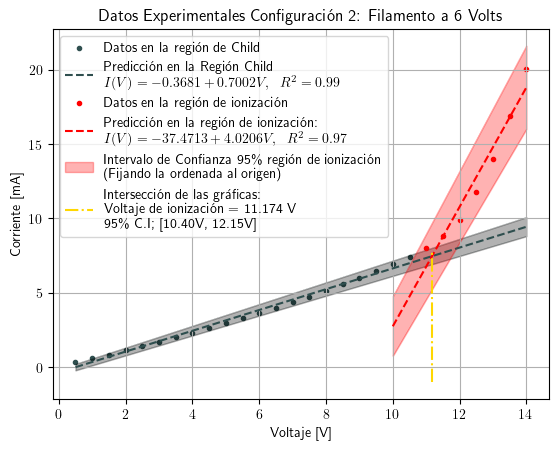

In [717]:
x1 = np.linspace(0.5,14,4)
x2 = np.linspace(10,14,4)

linea_arriba = lambda dato, ci_sup_ordenada, ci_sup_pendiente : ci_sup_ordenada + ci_sup_pendiente*dato; y_1_95 = linea_arriba(x1,-0.171 ,0.732  )
linea_abajo = lambda dato, ci_inf_ordenada, ci_inf_pendiente : ci_inf_ordenada + ci_inf_pendiente*dato; y_1_05 = linea_abajo(x1, -0.565 ,0.669 )
plt.scatter(x=conf2_6V.voltaje[0:21], y = conf2_6V.corriente[0:21],c="darkslategrey", marker=".", label="Datos en la región de Child")
plt.plot(x1, -0.3681  +    0.7002 *x1,  color = "darkslategrey", label = "Predicción en  la  Región Child\n $I(V) =-0.3681  +    0.7002V, ~~R^2 = 0.99$", linestyle = "--")
plt.plot(x1, y_1_95, color = "darkslategrey", lw = 0.1, linestyle = "--")
plt.plot(x1, y_1_05, color = "darkslategrey", lw = 0.1, linestyle = "--")
plt.fill_between(x1, y_1_95, y_1_05, where=(y_1_95 > y_1_05),color='black',alpha=0.3)


plt.scatter(x=conf2_6V.voltaje[21:], y = conf2_6V.corriente[21:],c="red", marker=".", label="Datos en la región de ionización")

linea_sup = lambda dato, ordenada, std_ordenada, pendiente, std_pendiente: (ordenada + std_ordenada) + (pendiente+std_pendiente)*dato
linea_inf = lambda dato, ordenada, std_ordenada, pendiente, std_pendiente: (ordenada - std_ordenada) + (pendiente-std_pendiente)*dato

y_1_05_ion = linea_sup(x2, -37.4713,    0  ,4.0206  ,    0.4/2  )
y_1_95_ion = linea_inf(x2, -37.4713 ,   0  , 4.0206    ,  0.4/2  )

plt.plot(x2, -37.4713   + 4.0206  *x2,color = "red", label = "Predicción en la región de ionización:\n $I(V) = -37.4713   + 4.0206V ,~~ R^2 = 0.97$", linestyle = "--")
plt.plot(x2, y_1_95_ion, color = "red", lw = 0.1, linestyle = "--")
plt.plot(x2, y_1_05_ion, color = "red", lw = 0.1, linestyle = "--")
plt.fill_between(x2, y_1_95_ion, y_1_05_ion, where=(y_1_95_ion < y_1_05_ion), color='red', alpha=0.3, interpolate=True, label='Intervalo de Confianza 95\%\  región de ionización\n (Fijando la ordenada al origen)')

# Graficar
plt.plot([11.174, 11.174], [-1, 7.8], '-.',color="gold", label = "Intersección de las gráficas: \n Voltaje de ionización = 11.174 V\n 95\%\ C.I; [10.40V, 12.15V]")
plt.grid(); plt.title("Datos Experimentales Configuración 2: Filamento  a 6 Volts"); plt.legend(); plt.xlabel("Voltaje [V]"); plt.ylabel("Corriente [mA]");


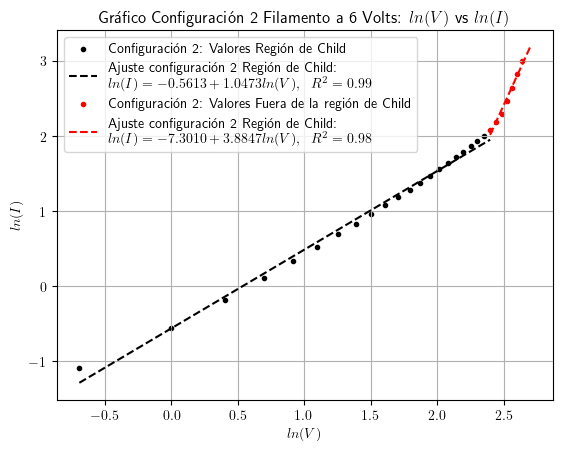

In [721]:
x = np.linspace(log_conf2_6.voltaje[0],log_conf2_6.voltaje[21],10)
plt.scatter(log_conf2_6.voltaje[0:21], log_conf2_6.corriente[0:21], c = "black", marker=".", label = "Configuración 2: Valores Región de Child")
plt.plot(x, -0.5613   + 1.0473*x , color = "black", label = "Ajuste configuración 2 Región de Child:\n $ln(I) =-0.5613   + 1.0473  ln(V) ,~~R^2=0.99 $", linestyle = "--")

x2 = np.linspace(log_conf2_6.voltaje[21],2.7,10)
plt.scatter(log_conf2_6.voltaje[21:28], log_conf2_6.corriente[21:28], c = "red", marker=".", label = "Configuración 2: Valores Fuera de la región de Child")
plt.plot(x2, -7.3010  +   3.8847  *x2 , color = "red", label = "Ajuste configuración 2 Región de Child:\n $ln(I) =-7.3010  +   3.8847 ln(V),~~R^2 = 0.98 $", linestyle = "--")

plt.grid(); plt.title("Gráfico Configuración 2 Filamento a 6 Volts: $ln(V)$ vs $ln(I)$"); plt.xlabel("$ln(V)$"); plt.ylabel("$ln(I)$");plt.legend();

In [722]:
print(ln_model1.summary())

                            OLS Regression Results                            
Dep. Variable:              corriente   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     3007.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           2.18e-22
Time:                        03:07:43   Log-Likelihood:                 27.146
No. Observations:                  21   AIC:                            -50.29
Df Residuals:                      19   BIC:                            -48.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5613      0.032    -17.591      0.0

## Superposiciones de gráficas

Text(0.5, 1.0, 'Datos Experimentales: Filamento a 6 Volts')

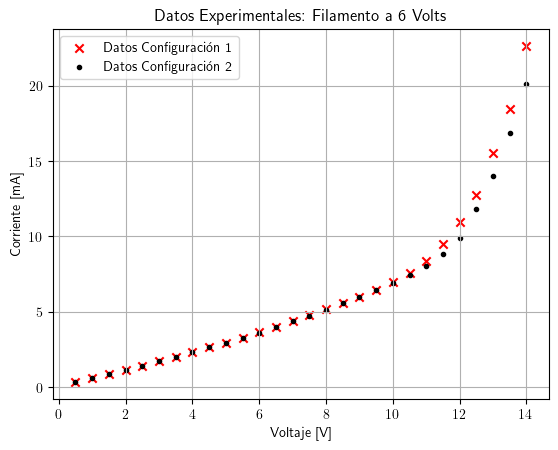

In [736]:
plt.scatter(x=conf1_6V.voltaje, y = conf1_6V.corriente,c="red", marker="x", label="Datos Configuración 1")
plt.scatter(x=conf2_6V.voltaje, y = conf2_6V.corriente,c="black", marker=".", label="Datos Configuración 2")
plt.legend(); plt.grid(); plt.xlabel("Voltaje [V]"); plt.ylabel("Corriente [mA]"); plt.title("Datos Experimentales: Filamento a 6 Volts")

Text(0.5, 1.0, 'Datos Experimentales: Filamento a 4 Volts')

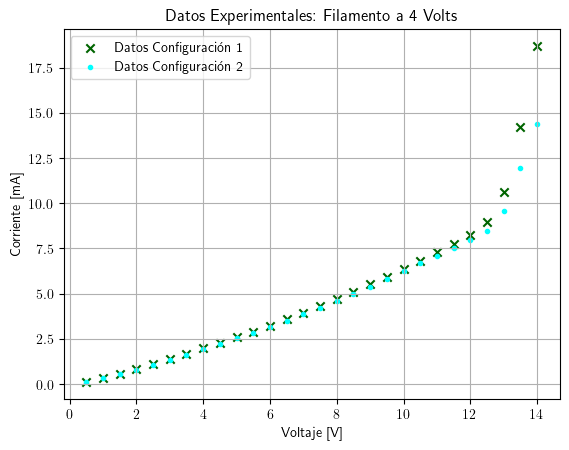

In [742]:
plt.scatter(x=conf1.voltaje, y = conf1.corriente,c="darkgreen", marker="x", label="Datos Configuración 1")
plt.scatter(x=conf2.voltaje, y = conf2.corriente,c="cyan", marker=".", label="Datos Configuración 2")
plt.legend(); plt.grid(); plt.xlabel("Voltaje [V]"); plt.ylabel("Corriente [mA]"); plt.title("Datos Experimentales: Filamento a 4 Volts")